In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [18]:
userselections = []
userfolder = './users'
for f in os.listdir(userfolder):
    if f.endswith('.json'):
        with open(os.path.join(userfolder, f)) as json_file:
            userselections.append(json.load(json_file))

In [19]:
for user in userselections:
    for selection in user:
        selection['models'] = [selection['taskImgs'][1].split('/')[-1].split('.')[0],
                               selection['taskImgs'][2].split('/')[-1].split('.')[0]]
        judge_idx = int(selection['judge'][-1]) - 1
        selection['judge'] = selection['models'][judge_idx]
        del selection['taskImgs']

In [22]:
def whichModel(models):
    return models[1] if models[0] == 'w++' else models[0]

In [68]:
w = {'inversion': {'w++': [], 'w': []}, 'smile': {'w++': [], 'w': []}, 'age': {'w++': [], 'w': []}, 'transition': {'w++': [], 'w': []}}
wp = {'inversion': {'w++': [], 'w+': []}, 'smile': {'w++': [], 'w+': []}, 'age': {'w++': [], 'w+': []}, 'transition': {'w++': [], 'w+': []}}
for user in userselections:
    w_t = {'inversion': {'w++': 0, 'w': 0}, 'smile': {'w++': 0, 'w': 0}, 'age': {'w++': 0, 'w': 0}, 'transition': {'w++': 0, 'w': 0}}
    wp_t = {'inversion': {'w++': 0, 'w+': 0}, 'smile': {'w++': 0, 'w+': 0}, 'age': {'w++': 0, 'w+': 0}, 'transition': {'w++': 0, 'w+': 0}}
    for task in user:
        m = whichModel(task['models'])
        if m == 'w':
            w_t[task['taskName']][task['judge']] += 1
        elif m == 'w+':
            wp_t[task['taskName']][task['judge']] += 1
    for task in w_t:
        if w_t[task]['w'] != 0 or w_t[task]['w++'] != 0:
            w[task]['w'].append(w_t[task]['w'])
            w[task]['w++'].append(w_t[task]['w++'])
        if wp_t[task]['w+'] != 0 or wp_t[task]['w++'] != 0:
            wp[task]['w+'].append(wp_t[task]['w+'])
            wp[task]['w++'].append(wp_t[task]['w++'])

In [70]:
wp['inversion']['w++'] = np.sum(wp['inversion']['w++'])
wp['inversion']['w+'] = np.sum(wp['inversion']['w+'])
wp['smile']['w++'] = np.sum(wp['smile']['w++'])
wp['smile']['w+'] = np.sum(wp['smile']['w+'])
wp['age']['w++'] = np.sum(wp['age']['w++'])
wp['age']['w+'] = np.sum(wp['age']['w+'])
wp['transition']['w++'] = np.sum(wp['transition']['w++'])
wp['transition']['w+'] = np.sum(wp['transition']['w+'])

In [71]:
wp

{'inversion': {'w++': 35, 'w+': 28},
 'smile': {'w++': 28, 'w+': 15},
 'age': {'w++': 52, 'w+': 2},
 'transition': {'w++': 35, 'w+': 7}}

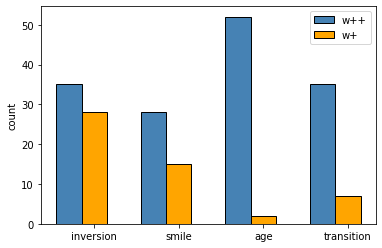

In [80]:
barWidth = 0.3
bars1 = [wp['inversion']['w++'], wp['smile']['w++'], wp['age']['w++'], wp['transition']['w++']]
bars2 = [wp['inversion']['w+'], wp['smile']['w+'], wp['age']['w+'], wp['transition']['w+']]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width = barWidth, color = 'steelblue', edgecolor = 'black', label='w++')
plt.bar(r2, bars2, width = barWidth, color = 'orange', edgecolor = 'black', label='w+')

plt.xticks([r + barWidth for r in range(len(bars1))], ['inversion', 'smile', 'age', 'transition'])
plt.ylabel('count')
plt.legend()

In [72]:
w['inversion']['w++'] = np.sum(w['inversion']['w++'])
w['inversion']['w'] = np.sum(w['inversion']['w'])
w['smile']['w++'] = np.sum(w['smile']['w++'])
w['smile']['w'] = np.sum(w['smile']['w'])
w['age']['w++'] = np.sum(w['age']['w++'])
w['age']['w'] = np.sum(w['age']['w'])
w['transition']['w++'] = np.sum(w['transition']['w++'])
w['transition']['w'] = np.sum(w['transition']['w'])

In [73]:
w

{'inversion': {'w++': 55, 'w': 5},
 'smile': {'w++': 29, 'w': 10},
 'age': {'w++': 51, 'w': 18},
 'transition': {'w++': 29, 'w': 11}}

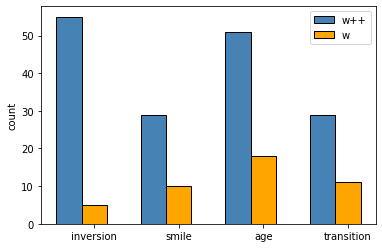

In [79]:
barWidth = 0.3
bars1 = [w['inversion']['w++'], w['smile']['w++'], w['age']['w++'], w['transition']['w++']]
bars2 = [w['inversion']['w'], w['smile']['w'], w['age']['w'], w['transition']['w']]

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width = barWidth, color = 'steelblue', edgecolor = 'black', label='w++')
plt.bar(r2, bars2, width = barWidth, color = 'orange', edgecolor = 'black', label='w')

plt.xticks([r + barWidth for r in range(len(bars1))], ['inversion', 'smile', 'age', 'transition'])
plt.ylabel('count')
plt.legend()